In [1]:
import sys
sys.path.append("../../regression_pipeline")

import data_preparation as prep
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# Ignore future warnings that often pop up
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Exploratory data analysis on Boston housing data
df = prep.load_dataset("../../datasets/prostate_cancer.csv")
prep.prepare_data(df, drop_na=True)
display(df.head())
y = df["lpsa"]
x = df.drop(columns="lpsa")
x.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000


<Figure size 432x288 with 0 Axes>

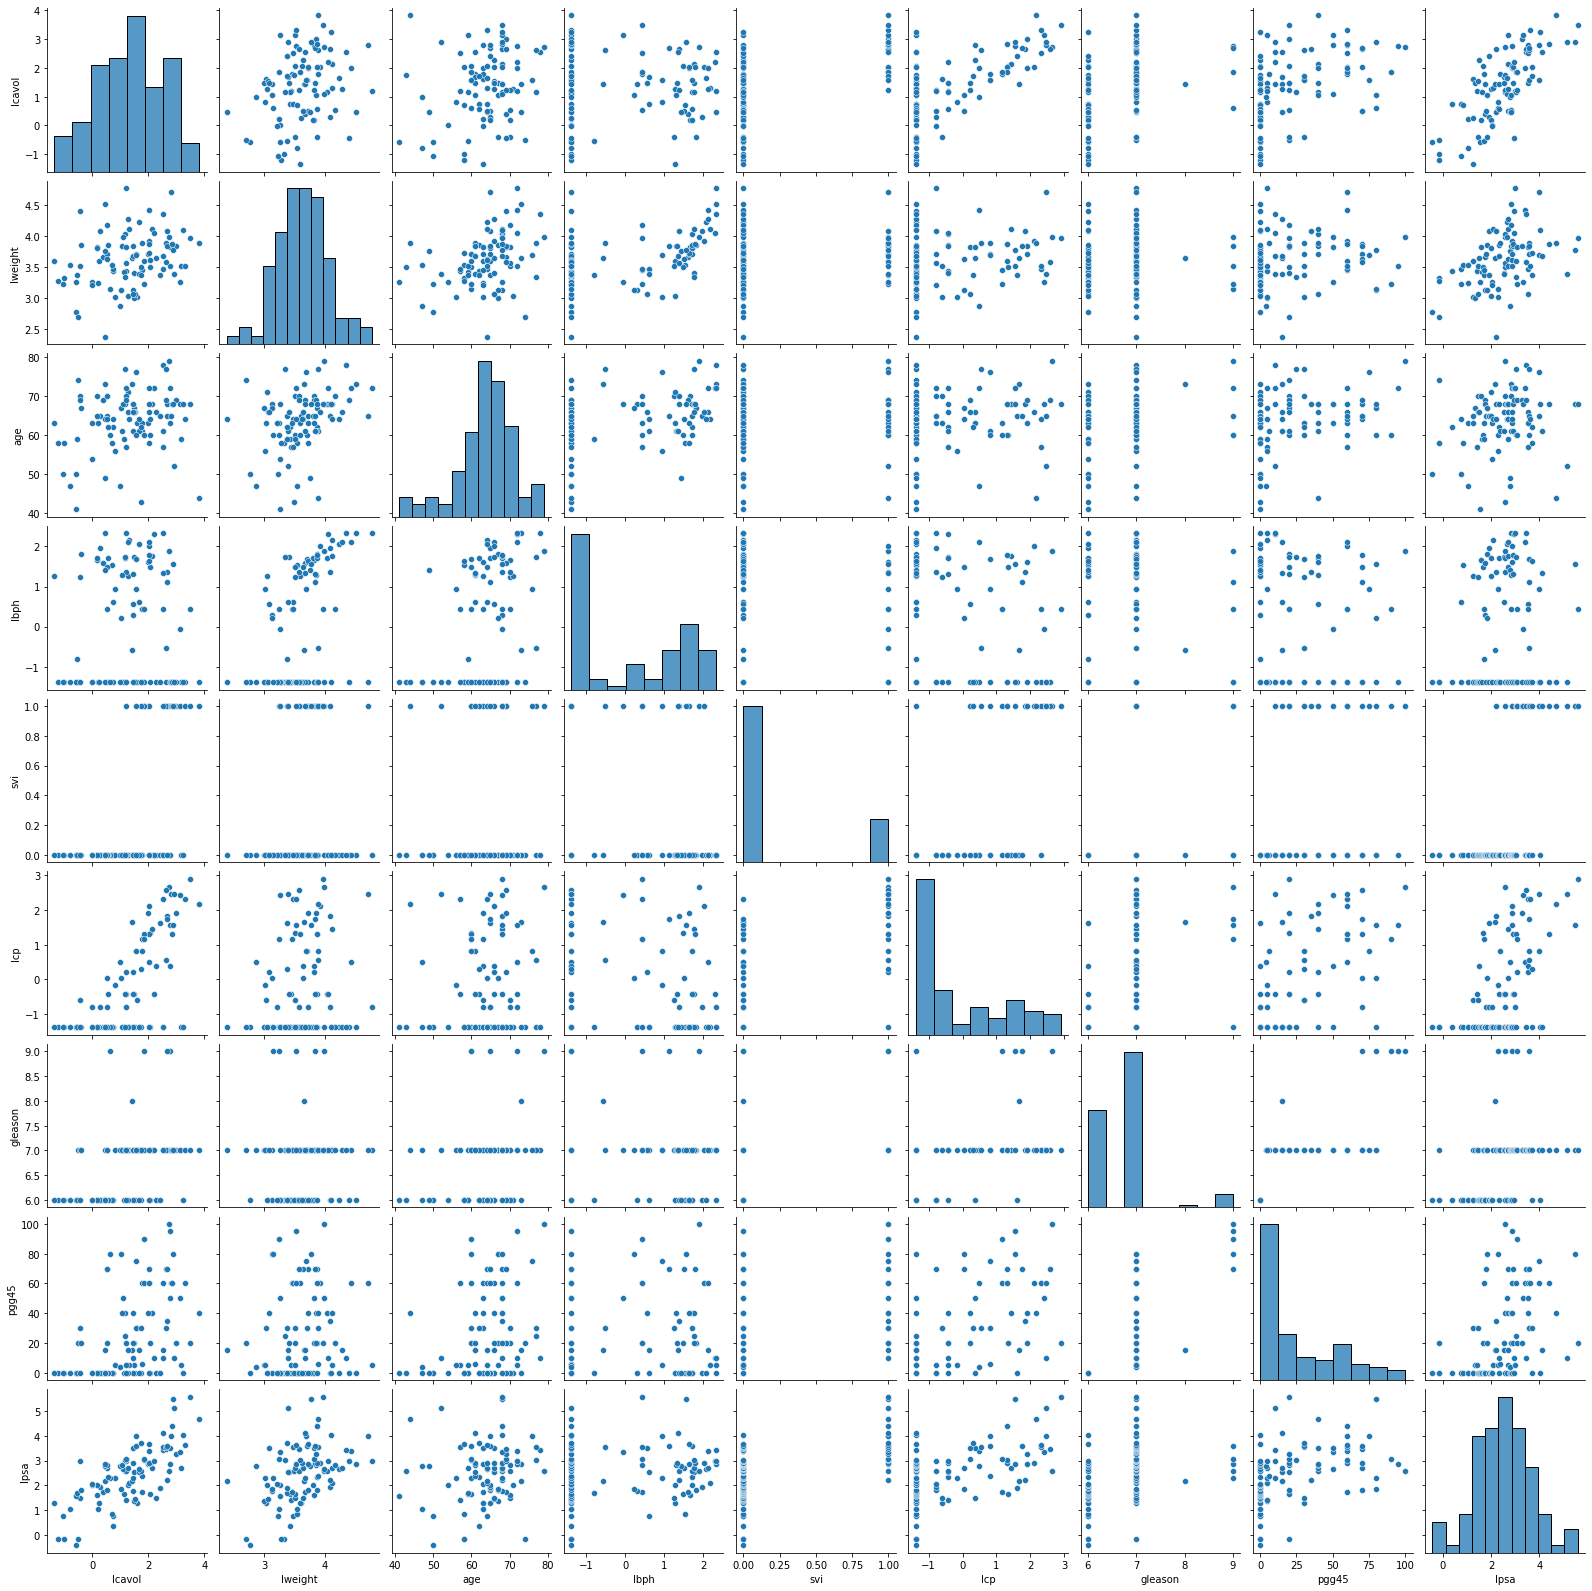

<Figure size 432x288 with 0 Axes>

In [3]:
sb.pairplot(df)
plt.figure()

From the above plots we can see that there is only two variables that correlates linearly relatively well with the target : lcavol. It seems reasonable as it is a measure of cancer volume.

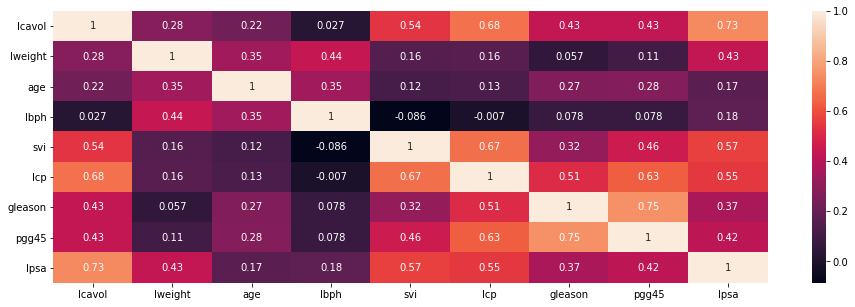

In [4]:
# PLot the correlation of variables
plt.figure(figsize=(16,5))
fig = sb.heatmap(df.corr(),annot=True)
plt.savefig("../../images/correlationmatrix_cancer.png", format="png")

From this table we can see that other variables are relevant to the problem : LCP and SVI. On the other hand, age and lpbh seem to be bad indicators of prostate cancer. These variables will most likely not contribute well to the analysis